# Demo: Control of a wheel

Import modules and configure the notebook.

In [21]:
# These are standard modules
import time
import numpy as np
import matplotlib.pyplot as plt

# This is a custom interface to the simulator
import ae353_wheel

Create an instance of the `Simulator` class, which is an interface to the [pybullet](http://pybullet.org) simulation engine that uses [meshcat](https://github.com/meshcat-dev/meshcat-python) for visualization in a browser window.

There are four optional arguments that you may want to use:

* `display` (`True` or `False`) is whether or not to show the simulation window;
* `damping` (a non-negative floating-point number) is the coefficient of viscous friction at the wheel joint;
* `roll` (a floating-point number) is the angle of the ground;
* `mass` (a non-negative floating-point number) is the mass in kilograms of the orange marker that is attached to the wheel.

You can also change `damping`, `roll`, or `mass` on the fly by using the functions `simulator.set_damping()`, `simulator.set_roll()`, and `simulator.set_mass()`. If you use these functions, you **must** call `simulator.reset(...)` (with appropriate initial conditions) and `controller.reset()` before running the simulator again, or your results may be unreliable.

In [22]:
simulator = ae353_wheel.Simulator(
    display=True,
    damping=0.,
    roll=0.,
    mass=0.,
)

argv[0]=
You can open the visualizer by visiting the following URL:
http://127.0.0.1:7002/static/


Modify the `run` function to define a controller that chooses actuator commands (`wheel_torque`), possibly based on the current time (`t`) or on sensor measurements (`wheel_angle` and `wheel_velocity`). By default, this function applies zero torque to the wheel. It is called 100 times per second (i.e., at 100 Hz) by the simulator.

In [23]:
class Controller:
    def __init__(self):
        pass
    
    def reset(self):
        pass
    
    def run(self, t, wheel_angle, wheel_velocity):
        """
        INPUTS
         t = current time (s)
         wheel_angle = angle of wheel (rad)
         wheel_velocity = angular of wheel (rad / s)
        
        OUTPUTS
         wheel_torque = torque applied to wheel by motor on ground (N m)
        """
        
        # FIXME: replace the following line
        # wheel_torque = 1.
        # wheel_torque = - 0.1 * wheel_angle
        # wheel_torque = - 0.1 * wheel_angle / wheel_velocity
        # wheel_torque = - 0.1 * wheel_angle - (wheel_velocity**2)
        wheel_torque = - 37. * wheel_angle - 35. * wheel_velocity + 37*np.pi/5
        
        return wheel_torque

Create an instance of the controller.

In [24]:
controller = Controller()

Reset the simulator. Optional arguments allow you to specify the initial wheel angle and velocity. If the value of either argument is `None` (or if the argument is left unspecified), then its value will be chosen at random.

In [25]:
simulator.reset(
    wheel_angle= 0.6,
    wheel_velocity= -2.9,
)

Reset the controller.

In [26]:
controller.reset()

Run the simulator.

In [27]:
data = simulator.run(
    controller,           # <-- required (an instance of your Controller class)
    max_time= 0.6,         # <-- optional (how long you want to run the simulation in seconds)
    data_filename=None,   # <-- optional (name of file to which you want data saved, e.g., 'my_data.json')
    video_filename=None,  # <-- optional (name of file to which you want video saved, e.g., 'my_video.mov')
)

Plot the results.

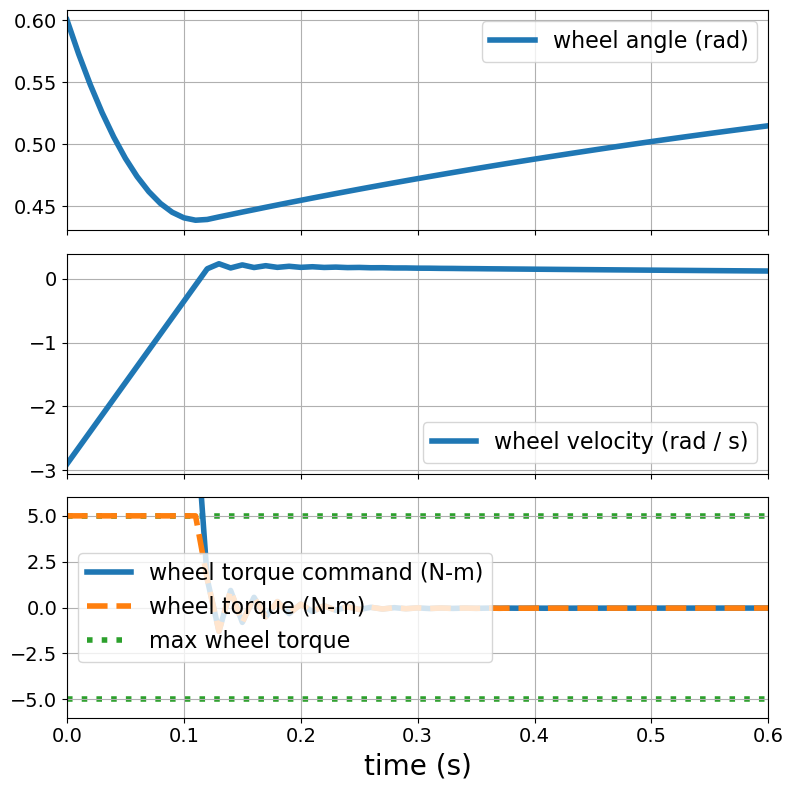

In [28]:
# Create a figure with three subplots, all of which share the same x-axis
fig, (
    ax_angle,
    ax_velocity,
    ax_torque,
) = plt.subplots(3, 1, figsize=(8, 8), sharex=True)

# Plot wheel angle on first subplot
ax_angle.plot(
    data['t'], data['wheel_angle'],
    label='wheel angle (rad)', linewidth=4,
)
ax_angle.grid()
ax_angle.legend(fontsize=16)
ax_angle.tick_params(labelsize=14)

# Plot wheel velocity on second subplot
ax_velocity.plot(
    data['t'], data['wheel_velocity'],
    label='wheel velocity (rad / s)', linewidth=4,
)
ax_velocity.grid()
ax_velocity.legend(fontsize=16)
ax_velocity.tick_params(labelsize=14)

# Plot wheel torque on third subplot
ax_torque.plot(
    data['t'], data['wheel_torque_command'],
    label='wheel torque command (N-m)', linewidth=4,
)
ax_torque.plot(
    data['t'], data['wheel_torque'],
    '--', label='wheel torque (N-m)', linewidth=4,
)
ax_torque.plot(
    data['t'], np.ones_like(data['t']) * simulator.tau_max,
    ':', label='max wheel torque', linewidth=4, color='C2', zorder=0,
)
ax_torque.plot(
    data['t'], -np.ones_like(data['t']) * simulator.tau_max,
    ':', linewidth=4, color='C2', zorder=0,
)
ax_torque.grid()
ax_torque.legend(fontsize=16)
ax_torque.tick_params(labelsize=14)

# Set x-axis properties (only need to do this on the third
# subplot since all three subplots share the same x-axis)
ax_torque.set_xlabel('time (s)', fontsize=20)
ax_torque.set_xlim([data['t'][0], data['t'][-1]])
ax_torque.set_ylim(-1.2 * simulator.tau_max, 1.2 * simulator.tau_max)

# Make the arrangement of subplots look nice
fig.tight_layout()

Save the figure (without transparent background).

In [29]:
fig.savefig('my_figure.png', facecolor='white', transparent=False)

Get, show, and save a snapshot of the simulation after the last time step.

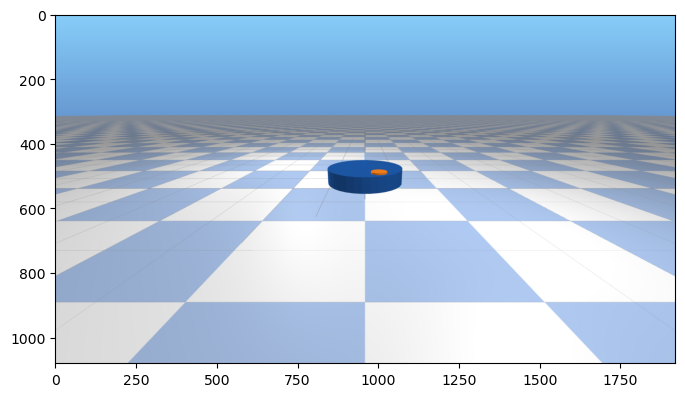

In [30]:
# Get snapshot as height x width x 4 numpy array of RGBA values
rgba = simulator.snapshot()

# Display snapshot
plt.figure(figsize=(8, 8))
plt.imshow(rgba)

# Save snapshot
plt.imsave('my_snapshot.png', rgba)

In [31]:
print(data['wheel_angle'])
print()
print(data['wheel_velocity'])

[0.6        0.57259155 0.54772958 0.52541409 0.50564507 0.48842254
 0.47374648 0.46161691 0.45203381 0.44499719 0.44050705 0.43856339
 0.43916621 0.44121623 0.44315225 0.44514019 0.44705041 0.4489849
 0.45086412 0.45275079 0.45459612 0.45643874 0.45824874 0.46004992
 0.46182401 0.46358567 0.46532377 0.4670474  0.46874976 0.47043654
 0.47210362 0.47375455 0.4753869  0.4770029  0.47860112 0.48018302
 0.48174777 0.48329632 0.48482826 0.48634421 0.48784399 0.48932805
 0.49079634 0.49224919 0.49368663 0.49510894 0.49651618 0.49790858
 0.49928625 0.50064939 0.50199811 0.50333259 0.50465297 0.50595941
 0.50725204 0.50853101 0.50979648 0.51104857 0.51228744 0.51351322
 0.51472605]

[-2.9        -2.64535209 -2.39070418 -2.13605627 -1.88140836 -1.62676046
 -1.37211255 -1.11746464 -0.86281673 -0.60816882 -0.35352091 -0.098873
  0.15577491  0.23453822  0.1690401   0.21664647  0.17564673  0.20413088
  0.17819568  0.19494971  0.17828386  0.18784813  0.17689154  0.1820547
  0.1746202   0.17709489  0.